In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h1>Two-body problem</h1>

<h2>Test particle orbits</h2>

In the lectures, we have considered test particle orbits around a central mass. We saw that orbital motion is confined to a plane, and that bound orbits come in the form of ellipses. We can numerically integrate the equations of motion to visualize the motion. In the visualizations below, the star is indicated by the star symbol, and the test particle by the green circle.

<IPython.core.display.Javascript object>


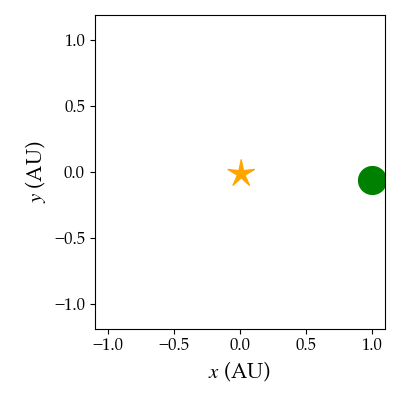

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, update_display, HTML
import ipywidgets as widgets

from nbody import nbody as nb
from nbody import plot as p

# Try and make plots look nice
plt.rcParams["font.family"] = 'serif'
plt.rcParams["mathtext.fontset"] = 'stix'
plt.rcParams["font.serif"] = 'Palatino'
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

orb = nb.Orbit(mass_ratio=0, eccentricity=0)

fig = plt.figure(figsize=(4,4),num='Test particle orbit')
ax = plt.gca()
ax.axis('equal')

ax.set_xlabel(r'$x$ (AU)', fontsize=15)
ax.set_ylabel(r'$y$ (AU)', fontsize=15)

plot_p, = ax.plot(np.asarray(orb.plan_pos)[:,0], 
                  np.asarray(orb.plan_pos)[:,1],
                  marker='o', ms=20, color='green', ls='None')

plot_s, = ax.plot(np.asarray(orb.star_pos)[:,0], 
                  np.asarray(orb.star_pos)[:,1],
                  marker='$\star$', ms=20, color='orange', ls='None')

plot_p.set_data(np.asarray(orb.plan_pos)[0,0], 
                np.asarray(orb.plan_pos)[0,1])
plot_s.set_data(np.asarray(orb.star_pos)[0,0], 
                np.asarray(orb.star_pos)[0,1])

plt.tight_layout()

Below an animation is shown for a circular orbit. Move the slider to change the eccentricity of the orbit (it may take some time to generate the animation). 

In [3]:
# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb = nb.Orbit(mass_ratio=0, eccentricity=0)
display(p.Anim(orb).show(fig, ax, plot_p, plot_s), display_id='span')

# When slider is moved, update animation
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass_ratio=0, eccentricity=change['new'])
        update_display(p.Anim(orb).show(fig, ax, plot_p, plot_s), display_id='span')
        
w.observe(on_value_change, names='value')

FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

By varying the eccentricity and looking at the orbit, can you determine:
- Where is pericentre/apocentre? 
- What is the value of the semimajor axis? 
- How does the speed of the particle change with phase?

The variation of speed can also be seen in a plot of velocity versus time. This is further explored in Exercise Sheet 2, question 3.


FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

<IPython.core.display.Javascript object>


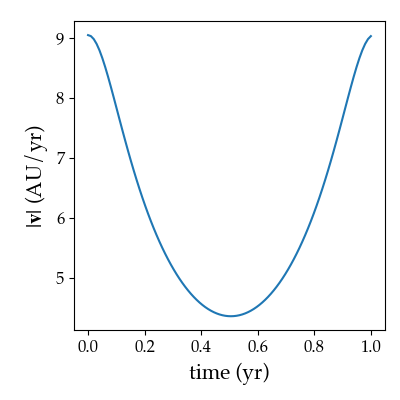

In [4]:
#%matplotlib notebook
#%matplotlib notebook
#import matplotlib.pyplot as plt

# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb = nb.Orbit(mass_ratio=0, eccentricity=0)

vxp = np.asarray(orb.plan_vel)[:,0]
vyp = np.asarray(orb.plan_vel)[:,1]

fig2 = plt.figure(figsize=(4,4),num='Velocity')
ax2 = plt.gca()

ax2.set_xlabel(r'time (yr)', fontsize=15)
ax2.set_ylabel(r'$|{\bf v}|$ (AU/yr)', fontsize=15)

ax2.set_ylim([0,10])
line, = ax2.plot(orb.time, np.sqrt(vxp*vxp + vyp*vyp))

plt.tight_layout()

# When slider is moved, update plot
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass_ratio=0, eccentricity=change['new'])
        vxp = np.asarray(orb.plan_vel)[:,0]
        vyp = np.asarray(orb.plan_vel)[:,1]
        
        line.set_data(orb.time, np.sqrt(vxp*vxp + vyp*vyp))
        
        ax2.relim()
        ax2.autoscale()

                
w.observe(on_value_change, names='value')

<h2>A massive companion</h2>

Now we move beyond test particle orbits, and look at the full 2-body problem.